<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/ML_With_Python/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EB%85%B8%EB%93%9C7_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 불러오기
import pandas as pd


In [72]:
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
dataset
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [73]:
# 데이터 샘플 확인하기
data.shape
data.head()

(178, 13)

In [4]:
# 스탠다드 스케일링, 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
type(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [5]:
# 데이터 복사, df 변수
df = data.copy()


In [6]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [7]:
# PCA, 2차원 축소
pca = PCA(n_components=2)

In [8]:
# PCA 변환
df = pca.fit_transform(df)
type(df)

numpy.ndarray

In [9]:
# 데이터 크기 확인
df.shape


(178, 2)

In [10]:
# 샘플 데이터 확인
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [11]:
# PCA => 2차원 축소하면 시각화 가능
# 시각화 라이브러리
import matplotlib.pyplot as plt
type(df)

numpy.ndarray

In [12]:
# 데이터 프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


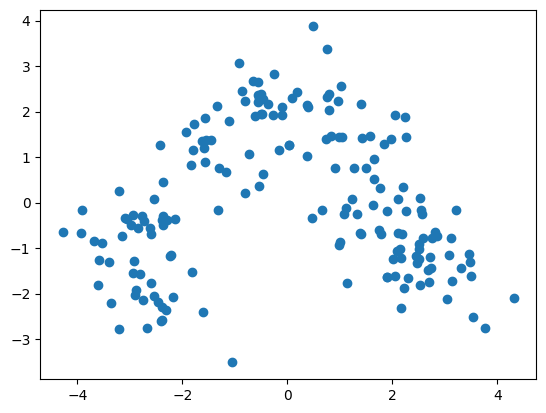

In [13]:
# scatter
plt.scatter(df.iloc[:, 0], df.iloc[:, 1]) # 컬럼명이 정수라 같은 결과 plt.scatter(df.loc[:, 0], df.loc[:, 1])

In [14]:
# 타켓 확인
dataset.target
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

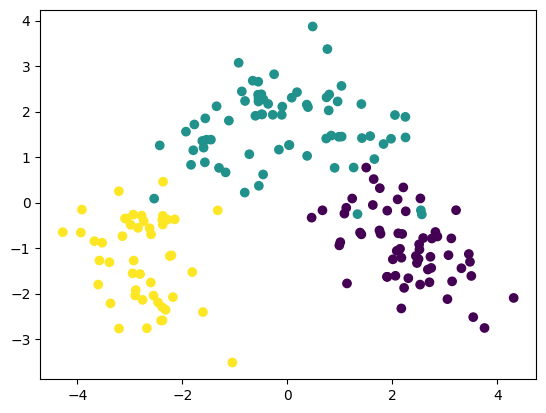

In [15]:
# scatter, c=target
# 비지도학습이기 때문에 특정 값이 아닌 각각의 색으로 군집된 타겟 군집을 출력
# 피처를 13 -> 2 축소
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [16]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693531


In [17]:
# 지도 학습, PCA 전후 비교
# PCA 후 데이터로 머신러닝 (2개 피처, df)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2023)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean() # 대략 95% 정확도 제공

# PCA 0.9492063492063492

0.9492063492063492

In [18]:
# PCA 전 데이터로 머신러닝 (13개 피처, data)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean() # 대략 96% 정확도 제공
# PCA 전 => 0.9609523809523811

0.9609523809523811

In [19]:
# 새 데이터 복사
df = data.copy()
type(df)

numpy.ndarray

In [20]:
# PCA 3차원 축소
pca = PCA(n_components=3)
type(pca)

sklearn.decomposition._pca.PCA

In [21]:
# pca 변환
df = pca.fit_transform(df)
type(df)

numpy.ndarray

In [22]:
# 데이터 프레임 변화
df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

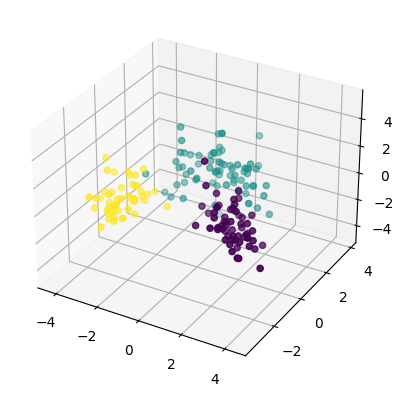

In [23]:
# 시각화, 3차원
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=dataset.target)

In [24]:
# 점진적 PCA
# 데이터 셋이 큰 경우 활용, 배치를 통해 점진적으로 수행
# 라이브러리 불러오기
# PCA 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [25]:
# 데이터 복사
df = data.copy()

In [26]:
# 점진적 PCA 지정
pca = IncrementalPCA(n_components=2, batch_size=1024)



In [27]:
#점진적 PCA 변환
df = pca.fit_transform(df)


In [28]:
# 데이터 프레임 변화
df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

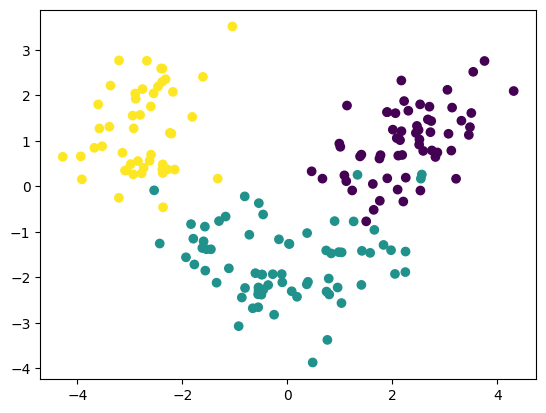

In [29]:
# 시각화
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [30]:
# 데이터 설명 (%), 이 경우는 적은 데이터를 나눠 차원 축소를 진행해 상대적으로 정확도가 떨어짐.
# 단, 메모리에 한 번에 로드할 수 없는 데이터 셋을 다루는 경우에는 유용할 것으로 판단
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# batch_size=16 => 0.4924119400154383
# batch_size=32 => 0.5185612830339625
# batch_size=32 => 0.5227207030850481
# batch_size=1024 => 0.5540633835693529

[0.36198848 0.1920749 ]
0.5540633835693529


In [31]:
# 희소 PCA
# 적절한 희소성을 유지 (alpha 값으로 조정)
# 오버피팅 방지

In [32]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [33]:
# 데이터 복사
df = data.copy()

In [34]:
# 희소 PCA
pca = SparsePCA(n_components=2, alpha=0.01)

In [35]:
# 희소 PCA 변환
df = pca.fit_transform(df)

In [36]:
# 데이터 프레임 변화
df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

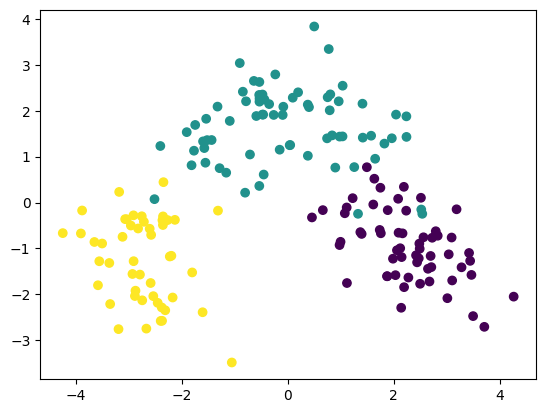

In [37]:
# 시각화
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [38]:
# 지도 학습 랜덤포레스트, 희소 PCA 전후 비교
# PCA 후 데이터로 머신러닝 (2개 피처, df)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2023)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean() # 대략 95% 정확도 제공

# PCA 0.9492063492063492
# 희소 PCA alpha=0.01 0.9492063492063492
# 희소 PCA alpha=0.05 0.954920634920635

0.9492063492063492

In [39]:
# 커널 Kernel PCA
# 비선형으로 차원축소
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [40]:
# 데이터 복사
df = data.copy()

In [41]:
# 희소 PCA
pca = KernelPCA(n_components=2)

In [42]:
# 희소 PCA 변환
df = pca.fit_transform(df)

In [43]:
# 데이터 프레임 변화
df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

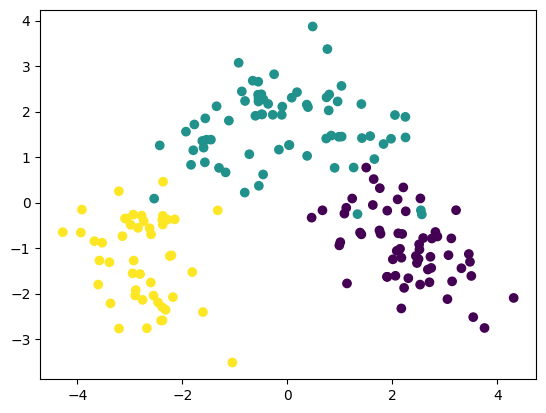

In [44]:
# 시각화
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [45]:
# 지도 학습 랜덤포레스트, 커널 PCA 전후 비교
# PCA 후 데이터로 머신러닝 (2개 피처, df)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2023)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean() # 대략 95% 정확도 제공

# PCA 0.9492063492063492
# 희소 PCA alpha=0.01 0.9492063492063492
# 희소 PCA alpha=0.05 0.954920634920635
# 커널 PCA 0.9492063492063492

0.9492063492063492

In [46]:
# SVD Singular Value Decomposition 특이값 분해
# 행렬을 특정한 구조로 분해하는 방식
# 신호 처리와 통계학 등의 분야에서 자주 사용됨.
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [47]:
# 데이터 복사
df = data.copy()

In [48]:
# 희소 PCA
pca = TruncatedSVD(n_components=2)

In [49]:
# 희소 PCA 변환
df = pca.fit_transform(df)

In [50]:
# 데이터 프레임 변화
df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

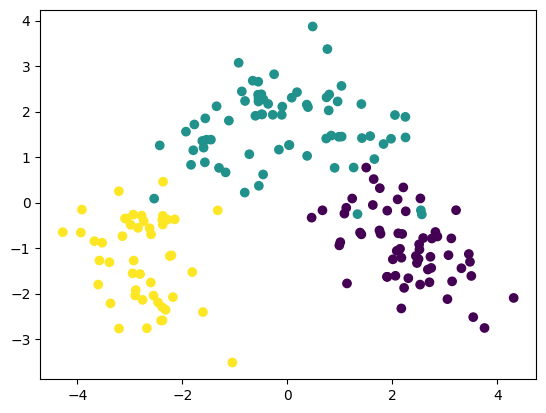

In [51]:
# 시각화
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [52]:
# 지도 학습 랜덤포레스트, SVD 전후 비교
# PCA 후 데이터로 머신러닝 (2개 피처, df)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2023)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean() # 대략 95% 정확도 제공

# PCA 적용 전 13개 피처 => 0.9609523809523811
# PCA 적용 후 2개의 피처
# PCA 0.9492063492063492
# 희소 PCA alpha=0.01 0.9492063492063492
# 희소 PCA alpha=0.05 0.954920634920635
# 커널 PCA 0.9663492063492063
# SVD PCA 0.9492063492063492

0.9492063492063492

In [53]:
# Q. 아래 코드를 참고 및 수정하여, 데이터 원본과 데이터를 pca로 차원을
# 2,3,4,5,6차원으로 했을 때의 랜덤포레스트 모델 결과를 비교해보세요.

# 와인 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
df = data.copy()

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

# PCA 후 데이터로 머신러닝
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())

# PCA 전 데이터로 머신러닝
print(cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean())
# n=2 0.9492063492063492
# PCA 전 0.9553968253968254

0.9607936507936508
0.9553968253968254


In [54]:
# Q. 아래 코드를 참고 및 수정하여, 데이터 원본과 데이터를 pca로 차원을
# 2,3,4,5,6차원으로 했을 때의 랜덤포레스트 모델 결과를 비교해보세요.

# 와인 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)


# PCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

for n in [2,3,4,5,6]:
    df = data.copy()
    pca = PCA(n_components=n)
    df = pca.fit_transform(df)
    df = pd.DataFrame(df)
    model = RandomForestClassifier(random_state=2022)
    print(f'n_components={n} => ', end='')
    print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())

# PCA 전 데이터로 머신러닝
print('PCA 전 데이터로 머신러닝')
print(cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean())

n_components=2 => 0.9492063492063492
n_components=3 => 0.9663492063492063
n_components=4 => 0.9719047619047618
n_components=5 => 0.9663492063492063
n_components=6 => 0.9606349206349206
PCA 전 데이터로 머신러닝
0.9553968253968254


In [55]:
#2. 군집, 클러스터링
# 비계층적 군집분석
# 대표적인 K-means
# K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
# n_clusters 하리퍼파라미터 반드시 설정
# KMeans 라이브러리 불러오기
from sklearn.cluster import KMeans

In [56]:
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [57]:
# Kmeans 선언 및 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [58]:
# KMeans 예측
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [59]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


In [60]:
# PCA(차원축소) => 군집 => 시각화
df = data.copy()
pca = PCA(n_components=2) # 2차원
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head(3)




,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309


In [61]:
# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


In [62]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_

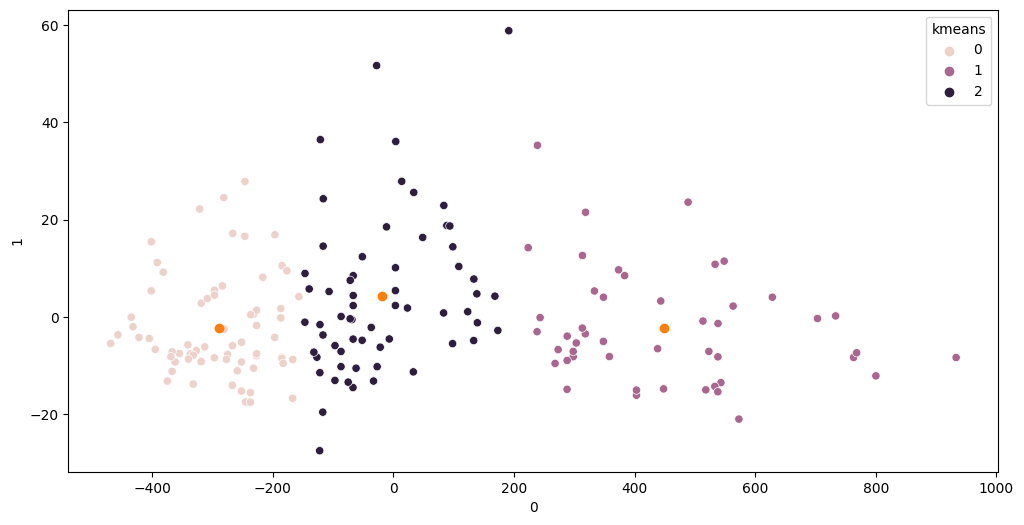

In [63]:
# 시각화
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:, 1], hue=df['kmeans'])
plt.scatter(centers[:, 0], centers[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

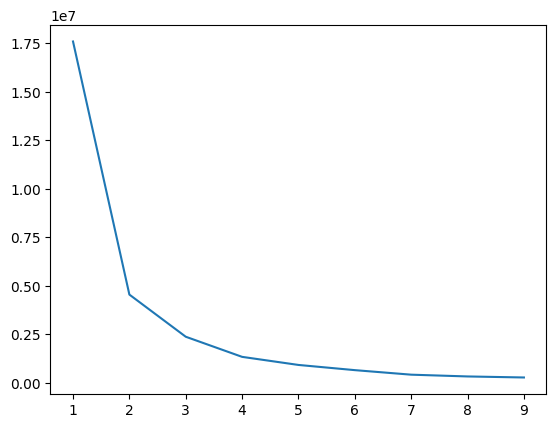

In [64]:
# 클러스터 개수 찾는 방법(엘보우 방법, elbow method)
# 군집 수 찾기
df = data.copy()
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=2023)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)

In [65]:
# 계층적 군집 분석
# k-means와 달리 군집 개수를 사전에 설정하지 않음
# 덴드로그램 ???
from scipy.cluster.hierarchy import dendrogram, ward

In [66]:
# PCA 2차원 축소
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head(3)

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309


In [67]:
# 샘플링
dataset.target[:3]
dataset.target[70:73]
dataset.target[160:163]

kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata


<ipython-input-67-5f7bfa7c81ef>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kdata = kdata.append(df[70:73])
<ipython-input-67-5f7bfa7c81ef>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kdata = kdata.append(df[160:163])


,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411471362, 30.991512411471362, 0.0],
  [0.0, 147.877877959848, 147.877877959848, 30.991512411471362],
  [0.0, 48.02737852215087, 48.02737852215087, 0.0],
  [0.0, 88.07194000276101, 88.07194000276101, 48.02737852215087],
  [0.0, 135.87135248973354, 135.87135248973354, 88.07194000276101],
  [0.0, 190.03011431770972, 190.03011431770972, 0.0],
  [135.87135248973354,
   461.0158736911475,
   461.0158736911475,
   190.03011431770972],
  [147.877877959848, 1026.396544382853, 1026.396544382853, 461.0158736911475]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C

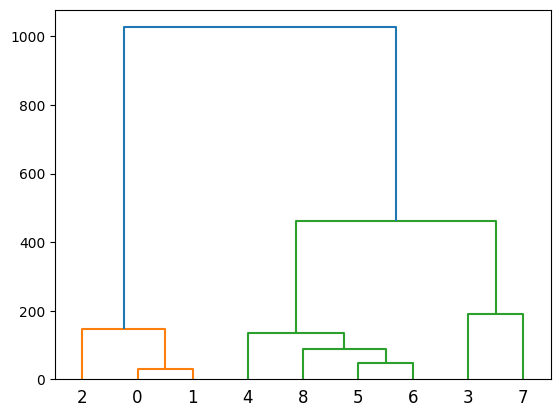

In [68]:
# 덴드로그램
linkage = ward(kdata)
dendrogram(linkage)

In [69]:
# Q. 아래 코드를 실행하면 영상처럼 wine 데이터에 target 컬럼과 pred 컬럼이 생깁니다.
# 이때 영상에서 설명한 바와 같이 target의 0,1,2 값 각각이 의미하는 실제 wine의 종류와
# pred의 0,1,2 값 각각이 의미하는 실제 wine의 종류는 매칭이 안될 수 있습니다.
# 그렇다면 target의 0은 pred의 어떤 숫자와 매칭이 되어야할까요?
# 가정 : 가장 많이 겹치는 값이 매칭된다고 가정합니다.
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)

df['target'] = dataset.target
df['pred'] = pred
df[['target', 'pred']]

from collections import Counter

from collections import Counter

most_common_pred = Counter(df['pred']).most_common(3)
display(most_common_pred)
most_common_pred_value = most_common_pred[0][0]
print("Most frequent value in 'pred':", most_common_pred_value)
# pred 값의 빈도는 [(0, 69), (2, 62), (1, 47)]
# 따라서 target의 0은 pred의 가장 많이 겹치는 값이 매칭된다고 가정 => pred '0'과 매칭
# pred 값의 빈도는 [(0, 69), (2, 62), (1, 47)]
# 따라서 target의 0은 pred의 가장 많이 겹치는 값이 매칭된다고 가정 => pred '0'과 매칭

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(1, 69), (2, 62), (0, 47)]

Most frequent value in 'pred': 1


In [70]:
# Q. 저번 스텝의 퀴즈에 이어서 target의 1,2 값은 각각 pred의 어떤 숫자와 매칭이 되어야할 지 찾아주세요.
# 가정 가장 많은 값은 0, 그 다음은 1, 그 다음은 2
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)

df['target'] = dataset.target
df['pred'] = pred
df

from collections import Counter

most_common_pred = Counter(df['pred']).most_common(3)
display(most_common_pred)
firstly_most_common_pred_value = most_common_pred[0][0]
secondly_most_common_pred_value = most_common_pred[1][0]
thirdly_most_common_pred_value = most_common_pred[2][0]
print("Firstly most frequent value in 'pred':", firstly_most_common_pred_value)
print("Secondly most frequent value in 'pred':", secondly_most_common_pred_value)
print("Thirdly Most frequent value in 'pred':", thirdly_most_common_pred_value)
# pred 값의 빈도는 [(0, 69), (2, 62), (1, 47)]
# 따라서 target의 0은 pred의 가장 많이 겹치는 값이 매칭된다고 가정 => pred '0'과 매칭

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(0, 69), (2, 62), (1, 47)]

Firstly most frequent value in 'pred': 0
Secondly most frequent value in 'pred': 2
Thirdly Most frequent value in 'pred': 1
